<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/11_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
a = np.array([np.nan, np.nan, np.nan, 4, 5])
df = pd.DataFrame(a)
df

,0
0,NaN
1,NaN
2,NaN
3,4.0
4,5.0


In [ ]:
df.mean(skipna=True)

0    4.5
dtype: float64

# Matplotlib

Matplotlib is a library for creating visualizations in python.  We will plot some graphs for various datasets.



The simplest graph is the graph with no data.

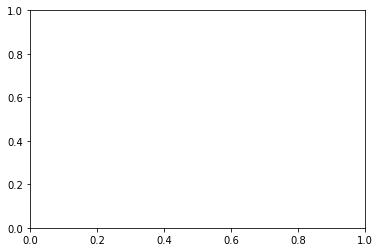

In [ ]:
fig, ax = plt.subplots()

`subplots()` returns a figure and axes.  `Figure` is the complete picture in which the graphs are shown.  `Axes` are the drawable parts of the figure.  We will look at axes in a bit.

Let us plot a simple "line graph".  Let us use `x` and `y` variables for the `plot()` function.

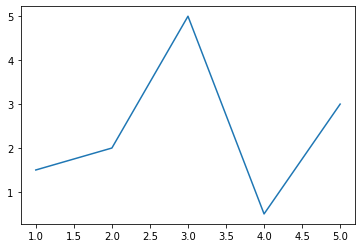

In [ ]:
x = [1, 2, 3, 4, 5]
y = [1.5, 2, 5, 0.5, 3]
fig, ax = plt.subplots()
ax.plot(x, y)


`x` and `y` are lists of the same size.


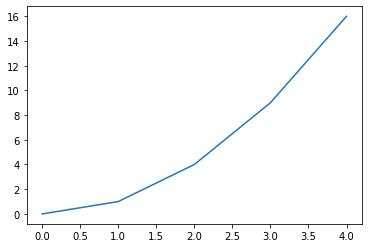

In [ ]:
x = list(range(5))
y = [i**2 for i in x]  # list comprehension

fig, ax = plt.subplots()
ax.plot(x, y)

Notice that the plot is a set of line segments.  Let us make it smooth.

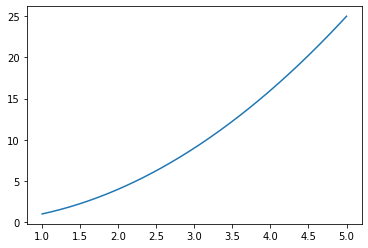

In [ ]:
x = np.linspace(1, 5, 400)
y = x**2  # numpy broadcasting

fig, ax = plt.subplots()
ax.plot(x, y)

`plot()` in  general takes numpy-array like objects for plotting. We have seen earlier that a series and a pandas column are internally is represented by a numpy array. So we can use it most of the time.

## What are axes?

Axes are the drawing areas of the figure.  Let us create two axes in the figure.

Text(0.5, 1.0, ' plot')

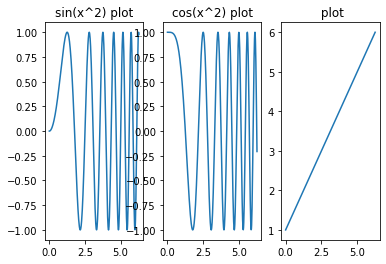

In [ ]:
# Creates just a figure and only two axes
fig, axs = plt.subplots(1,3)

# First create some toy data:
x1 = np.linspace(0, 2*np.pi, 400)


y1 = np.sin(x1**2)
y2 = np.cos(x1**2)
y3=np.linspace(1,6,400)

axs[0].plot(x1, y1)
axs[0].set_title('sin(x^2) plot')

axs[1].plot(x1, y2)
axs[1].set_title('cos(x^2) plot')

axs[2].plot(x1, y3)
axs[2].set_title(' plot')





**Exercise** 

plot e^x for x in the range 1 to 10. \
Hint: use np.exp(x) to e^x


In [ ]:
# plot e^x for x in the range 1 to 10
# Hint: use np.exp(x) to e^x


## Multiple lines in the same plot.



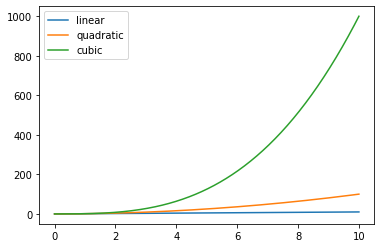

In [ ]:
x = np.linspace(0, 10, 400)

fig, ax = plt.subplots()
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.legend()


## Anatomy of a matplotlib figure.

<img src = "https://matplotlib.org/stable/_images/anatomy.png">
(source: <a href = "https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib</a>)

## Plots for Iris dataset


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url, header=None)
df.columns = ["sepalLength","sepalWidth","petalLength","petalWidth","species"]

df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Histogram

A histogram is an approximate representation of the distribution of numerical data. The range of values is grouped into "bins".  The bins are represented along the "x-axis".  The frequency of the items in the bin is represented along the "y-axis".

If we plot the histogram for the `sepalLength` of the Iris dataset, the range of the sepal length is divides into bins, then we count the number of items in each bin, then draw a rectangle above each bin value whose height is proportional to the number of items in that bin.

In [ ]:
# Say we have 10 bins, the bins are all equal in size.
# binwidth for 10 bins is:

binwidth= (max(df['sepalLength']) - min(df['sepalLength']))/10
binwidth

0.36000000000000004

In [ ]:
# range of the first bin,
# from the smallest value to the next bin width.
(min(df['sepalLength']) , min(df['sepalLength']) +  binwidth)

(4.3, 4.66)

In [ ]:
# range of the second bin
(min(df['sepalLength']) + binwidth , min(df['sepalLength']) +  2*binwidth)

(4.66, 5.02)

matplotlib provides a way to simply plot this graph without having to explicitly calculate these values. Notice that we only provide one variable.  The frequency/count of the variables is the "y" component.

Text(0, 0.5, 'Count')

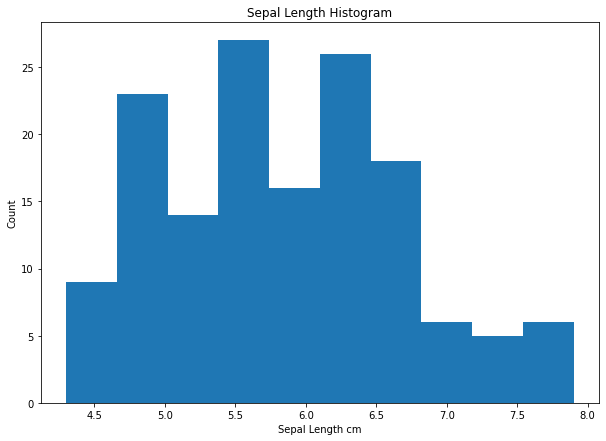

In [ ]:
plt.figure(figsize = (10, 7))

x = df["sepalLength"]
plt.hist(x) 
plt.title("Sepal Length Histogram") 
plt.xlabel("Sepal Length cm") 
plt.ylabel("Count") 

To change the number of bins we provide a parameter to the `hist` method.  We can also provide other parameters, like color.

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 <a list of 20 Patch objects>)

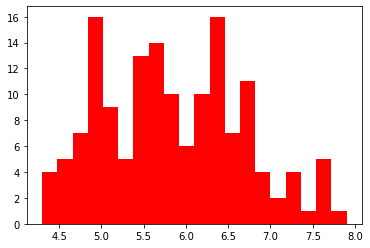

In [ ]:
plt.hist(x, bins = 20, color = 'red') 

# named colors in matplotlib: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

### Boxplot

Boxplot is another way to represent the distribution of data. It is a graphical representation of the concentration of the data. 

Box plot shows the quartiles of the data. That is, 25th percentile, median (50th percentile), 75th percentile. The range from the 25th percentile to the 75th percentile is called the Inter-Quartile Range (IQR).

The boxplot also shows whiskers.  Whiskers are usually 1.5 times the interquartile range.  So the top whisker is at 75th percentile + 1.5*IQR.
The bottom whisker is at 25th percentile - 1.5*IQR. Values outside the whiskers are usually considered as outliers.


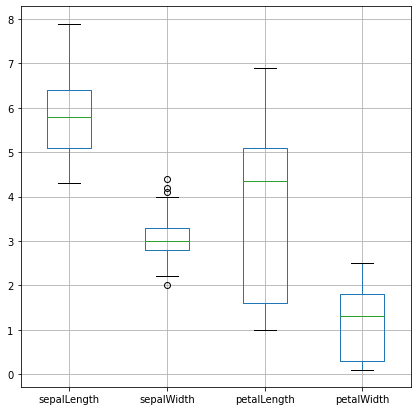

In [ ]:
plt.figure(figsize = (10, 7)) 
df.boxplot() 

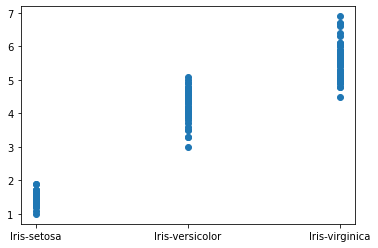

In [ ]:
x = df['species']
y = df['petalLength']
plt.scatter(x,y)
plt.show()


### Scatterplot

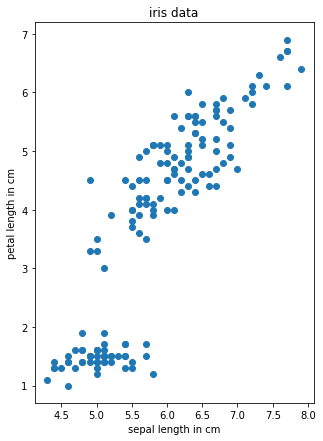

In [ ]:

plt.figure(figsize = (5, 7)) 
x = df["sepalLength"]
y= df["petalLength"]
plt.xlabel("sepal length in cm")
plt.ylabel("petal length in cm")
plt.title("iris data")
plt.scatter(x,y)

#### Groupby

If the species were color-coded, it will be visually easy to separate the species. There are a few options to do it. First let us look at using `groupby`.  Then we will use the `categorial` values. Finally, we will look at using a `map` to convert species to a color.

The point of doing the same thing in different ways is to see how the different techniques we have learned in the class can be used to solve a problem.

Recall `groupby` provides the subset of rows grouped by some values in a column.  In our case we can group by  `species`, each group will be `key`ed by the species name. Each group will be the rows for that species.

We can do aggregation for each of the groups.

In [ ]:
# group by species.
# get columns sepalLength and petalLength
# get min and max for the subset of rows for the two columns.
df.groupby(['species'])[["sepalLength", "petalLength"]].aggregate(["min", "max"])

sepalLength      petalLength     
                        min  max         min  max
species                                          
Iris-setosa             4.3  5.8         1.0  1.9
Iris-versicolor         4.9  7.0         3.0  5.1
Iris-virginica          4.9  7.9         4.5  6.9

In [ ]:
# groups is a dictionary-like object
# keys are the species
# values are the list of row numbers for the key.
df.groupby(['species']).groups

{'Iris-setosa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'Iris-versicolor': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'Iris-virginica': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}

In [ ]:
df.groupby(['species']).groups['Iris-setosa']

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Idea**: let us use the keys of the group names and map them to different colors.

Then for each group, plot the `sepalLength` vs. `petalLength` in the corresponding color.

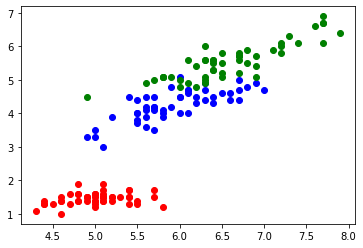

In [ ]:
my_colors = {'Iris-setosa': "red", 'Iris-versicolor': "blue", 'Iris-virginica':"green"}
for key, grp in df.groupby(['species']):
  x = grp["sepalLength"]
  y = grp["petalLength"]
  plt.scatter(x,y, color=my_colors[key])

plt.show()


#### Categoricals

**Idea**:  Let us use categorical method and use the color codes for each category.


In [ ]:
# Convert the species to a categorical type.
categories = pd.Categorical(df.species)
categories

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', ..., 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']
Length: 150
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
# Categories have codes.  We can use the codes to map to colors.

categories.codes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

We will use the default colormaps from matplotlib.

https://matplotlib.org/stable/tutorials/colors/colormaps.html

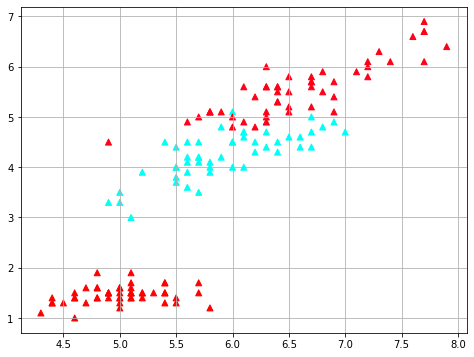

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
ax.scatter(df.sepalLength, df.petalLength,
           c = pd.Categorical(df.species).codes, 
           cmap = "hsv",
           marker = "^")
plt.show()

#### Applying a map to a series

**Idea** Scatter plot method takes x, y and a color series object.  So if we can convert the species type to a color type then we can pass the color items as a series object to plot.

In [ ]:
my_colors

{'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

In [ ]:
color_series = df["species"].map(my_colors)
color_series

0        red
1        red
2        red
3        red
4        red
       ...  
145    green
146    green
147    green
148    green
149    green
Name: species, Length: 150, dtype: object

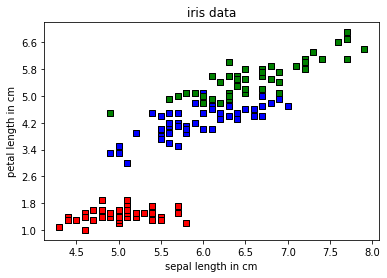

In [ ]:
x = df["sepalLength"]
y= df["petalLength"]
plt.xlabel("sepal length in cm")
plt.ylabel("petal length in cm")
plt.title("iris data")
plt.yticks(ticks=np.arange(1, 7,0.8))
plt.scatter(x,y, color = color_series, marker="s", edgecolors="black")

#### Using Seaborn

In [ ]:
import seaborn as sns

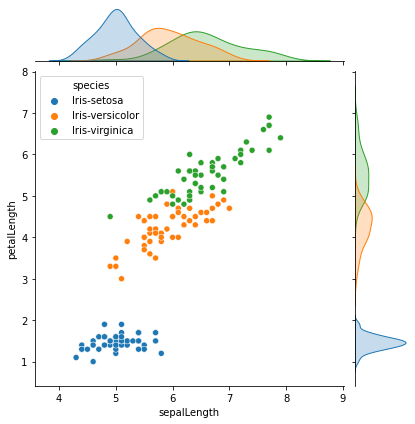

In [ ]:
sns.jointplot(x = "sepalLength", y = "petalLength", hue= 'species', data = df)
plt.show()

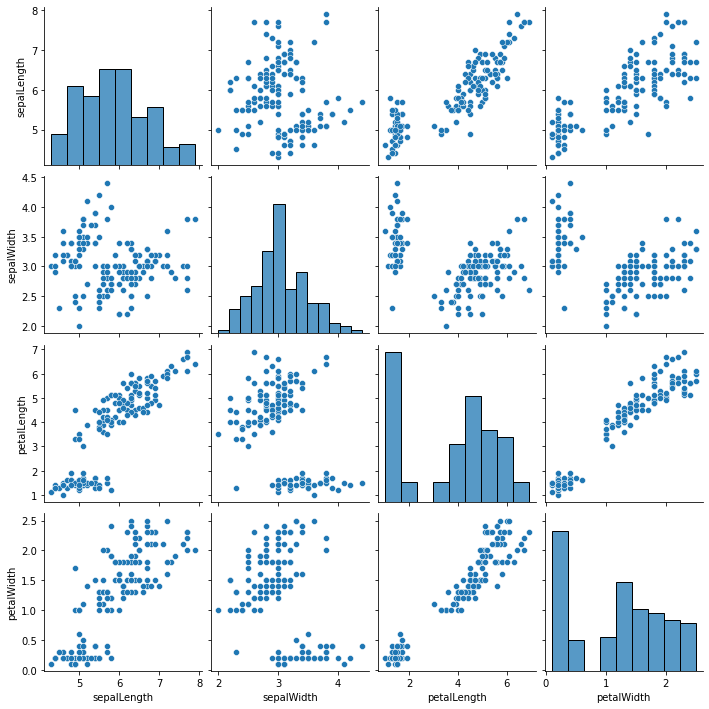

In [ ]:
sns.pairplot(df)
plt.show()

### Visualization for correlation with heatmap

Correlation coefficient is a measure of linear correlation between two sets of data. It has a value between −1 and 1. A positive value means positive correlation. Example:  Kids age and height.

A negative value means negative correlation --- when one variable increases, the other decreases. Example:  illness and vaccination.

A value of 0 means no correlation.

In [ ]:
corr_df = df.corr()
corr_df

,sepalLength,sepalWidth,petalLength,petalWidth
sepalLength,1.000000,-0.109369,0.871754,0.817954
sepalWidth,-0.109369,1.000000,-0.420516,-0.356544
petalLength,0.871754,-0.420516,1.000000,0.962757
petalWidth,0.817954,-0.356544,0.962757,1.000000


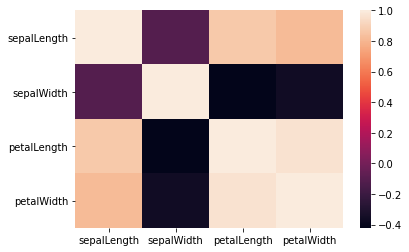

In [ ]:
sns.heatmap(corr_df)

### Bar chart

<BarContainer object of 150 artists>

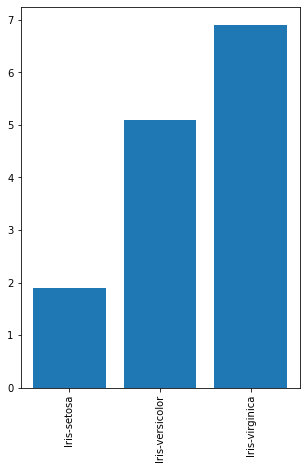

In [ ]:

plt.figure(figsize = (5, 7)) 
x = df["species"]
y=df["petalLength"]
plt.xticks(rotation='vertical') 
plt.bar(x,y)


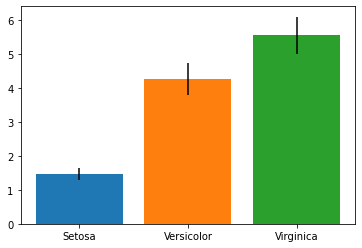

In [ ]:
fig, ax = plt.subplots()
setosa_petal_length = df[df['species'] == "Iris-setosa"]["petalLength"]
versicolor_petal_length = df[df['species'] == "Iris-versicolor"]["petalLength"]
virginica_petal_length = df[df['species'] == "Iris-virginica"]["petalLength"]

ax.bar("Setosa", setosa_petal_length.mean(), yerr=setosa_petal_length.std() )
ax.bar("Versicolor", versicolor_petal_length.mean(), yerr=versicolor_petal_length.std() )
ax.bar("Virginica", virginica_petal_length.mean(), yerr=virginica_petal_length.std() )

plt.show()


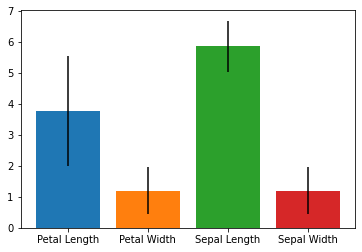

In [ ]:
fig, ax = plt.subplots()

ax.bar("Petal Length", df["petalLength"].mean(), yerr=df["petalLength"].std())
ax.bar("Petal Width", df["petalWidth"].mean(), yerr=df["petalWidth"].std())
ax.bar("Sepal Length", df["sepalLength"].mean(), yerr=df["sepalLength"].std())
ax.bar("Sepal Width", df["petalWidth"].mean(), yerr=df["petalWidth"].std())


plt.show()